In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, StandardScaler, QuantileTransformer, FunctionTransformer

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.linear_model import LogisticRegression
from scipy.stats import boxcox
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import (StandardScaler, MinMaxScaler,
                                   PolynomialFeatures)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_predict, train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [3]:
train_data = pd.read_csv('train.csv', sep = ';')
train_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.6,0.3,0.36,1.2,0.035,43,126,0.9909,3.01,0.63,11.4,6,white
1,7.7,0.5,0.26,1.9,0.062,9,31,0.9966,3.39,0.64,9.6,5,red
2,8.4,0.5,0.35,2.9,0.076,21,127,0.9976,3.23,0.63,9.2,5,red
3,7.5,0.4,0.33,5.0,0.045,30,131,0.9942,3.32,0.44,10.9,6,white
4,6.4,0.2,0.25,20.2,0.083,35,157,0.9998,3.17,0.50,9.1,5,white


In [4]:
train_data_red = train_data[train_data['type'] == 'red']
train_data_red.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1,7.7,0.5,0.26,1.9,0.062,9,31,0.9966,3.39,0.64,9.6,5,red
2,8.4,0.5,0.35,2.9,0.076,21,127,0.9976,3.23,0.63,9.2,5,red
18,8.8,0.4,0.49,2.8,0.083,18,111,0.9982,3.30,0.60,9.5,5,red
20,7.0,0.4,0.19,2.3,0.071,18,36,0.9948,3.39,0.56,10.9,5,red
21,8.2,0.4,0.38,2.6,0.093,23,60,0.9979,3.31,0.71,10.9,6,red


In [5]:
train_data_red['quality'].value_counts()

5    812
6    637
7    227
4     78
8     19
3      8
Name: quality, dtype: int64

In [6]:
train_data_red = train_data_red.drop(columns = ['type'])

In [7]:
from scipy import stats
z = np.abs(stats.zscore(train_data_red))


In [8]:

red_qualified = train_data_red[(z < 3).all(axis=1)]
red_qualified

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.7,0.5,0.26,1.9,0.062,9,31,0.9966,3.39,0.64,9.6,5
2,8.4,0.5,0.35,2.9,0.076,21,127,0.9976,3.23,0.63,9.2,5
18,8.8,0.4,0.49,2.8,0.083,18,111,0.9982,3.30,0.60,9.5,5
20,7.0,0.4,0.19,2.3,0.071,18,36,0.9948,3.39,0.56,10.9,5
21,8.2,0.4,0.38,2.6,0.093,23,60,0.9979,3.31,0.71,10.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6694,7.2,0.7,0.03,2.3,0.078,16,86,0.9974,3.53,0.57,9.7,5
6695,6.3,0.3,0.48,1.8,0.069,18,61,0.9959,3.44,0.78,10.3,6
6703,7.0,0.5,0.09,2.0,0.081,10,16,0.9948,3.43,0.59,11.5,6
6704,5.3,0.7,0.19,1.5,0.161,7,62,0.9940,3.62,0.61,11.0,5


C:\Users\minhd\AppData\Local\Temp\ipykernel_13196\4189465094.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(red_qualified[i])


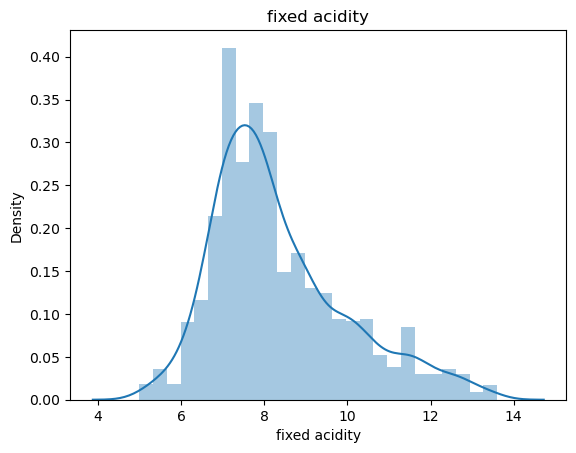

C:\Users\minhd\AppData\Local\Temp\ipykernel_13196\4189465094.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(red_qualified[i])


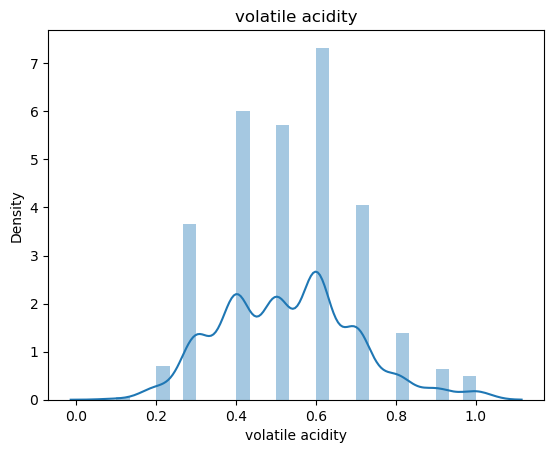

C:\Users\minhd\AppData\Local\Temp\ipykernel_13196\4189465094.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(red_qualified[i])


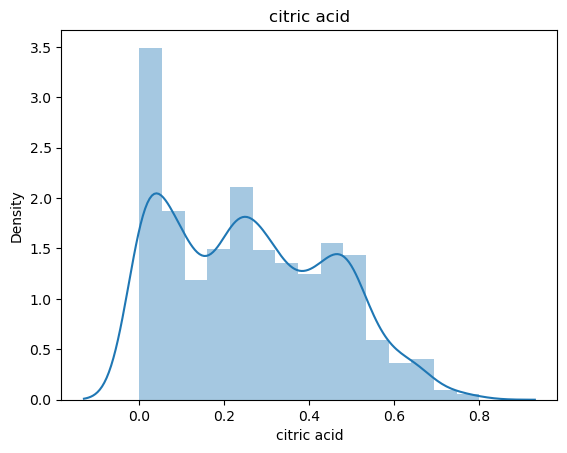

C:\Users\minhd\AppData\Local\Temp\ipykernel_13196\4189465094.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(red_qualified[i])


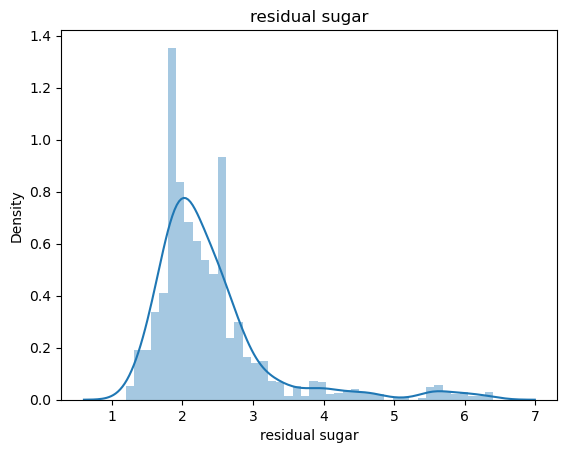

C:\Users\minhd\AppData\Local\Temp\ipykernel_13196\4189465094.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(red_qualified[i])


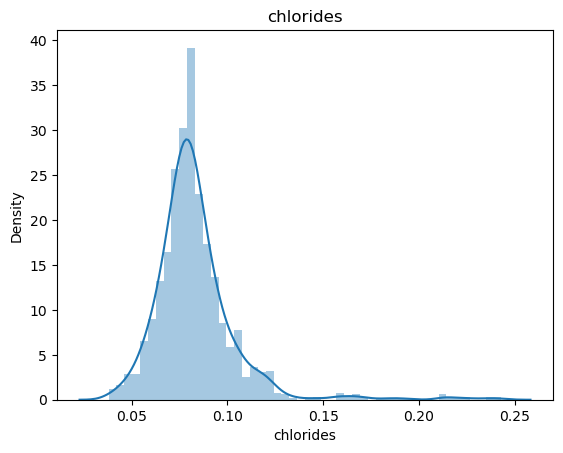

C:\Users\minhd\AppData\Local\Temp\ipykernel_13196\4189465094.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(red_qualified[i])


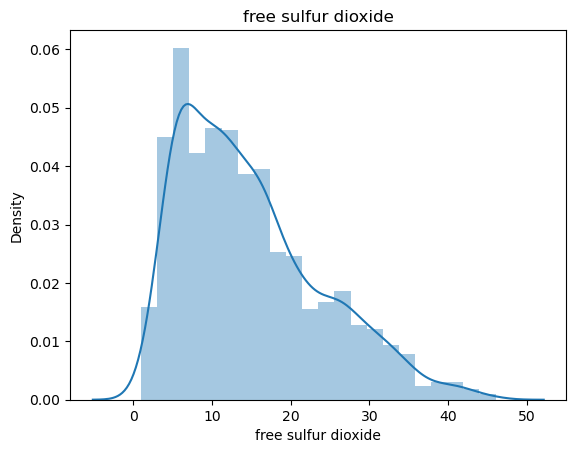

C:\Users\minhd\AppData\Local\Temp\ipykernel_13196\4189465094.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(red_qualified[i])


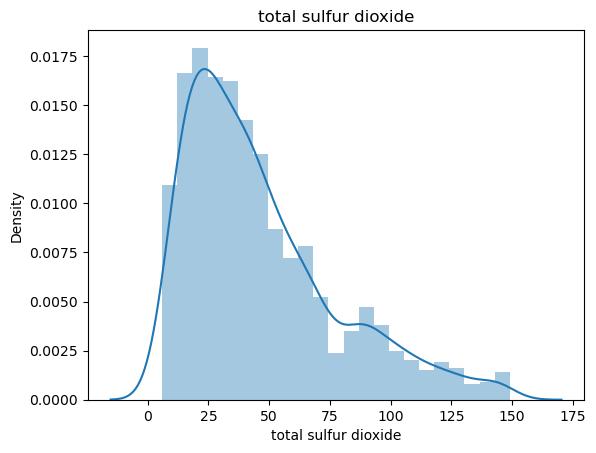

C:\Users\minhd\AppData\Local\Temp\ipykernel_13196\4189465094.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(red_qualified[i])


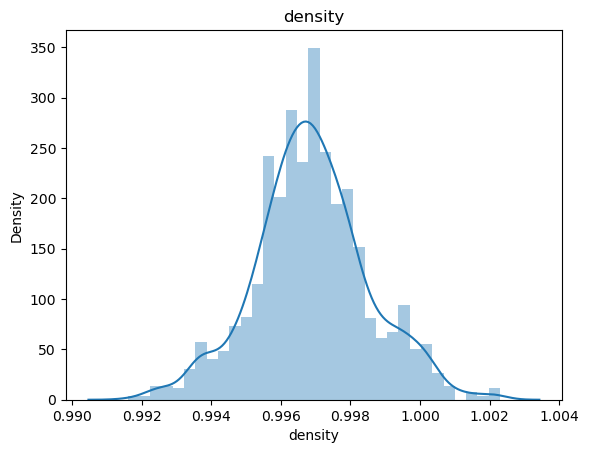

C:\Users\minhd\AppData\Local\Temp\ipykernel_13196\4189465094.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(red_qualified[i])


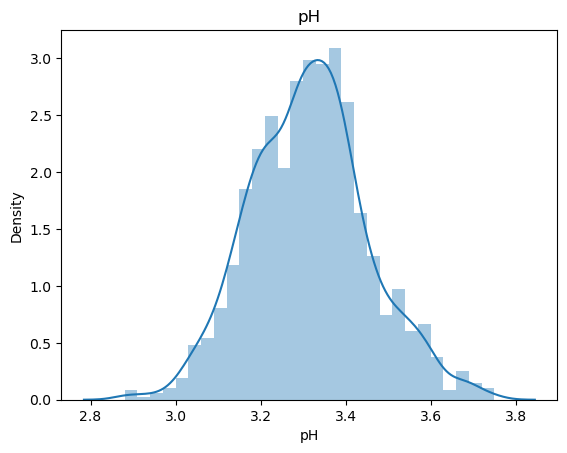

C:\Users\minhd\AppData\Local\Temp\ipykernel_13196\4189465094.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(red_qualified[i])


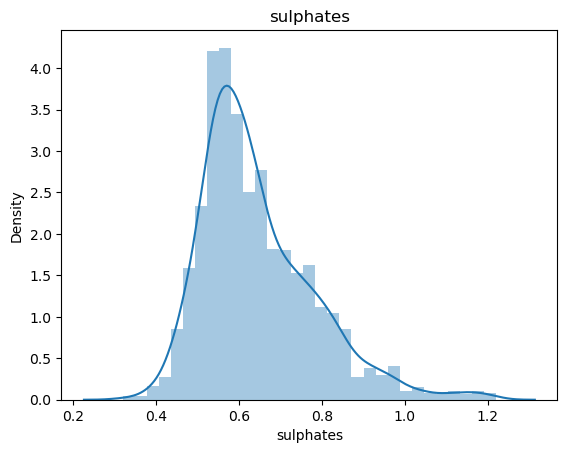

C:\Users\minhd\AppData\Local\Temp\ipykernel_13196\4189465094.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(red_qualified[i])


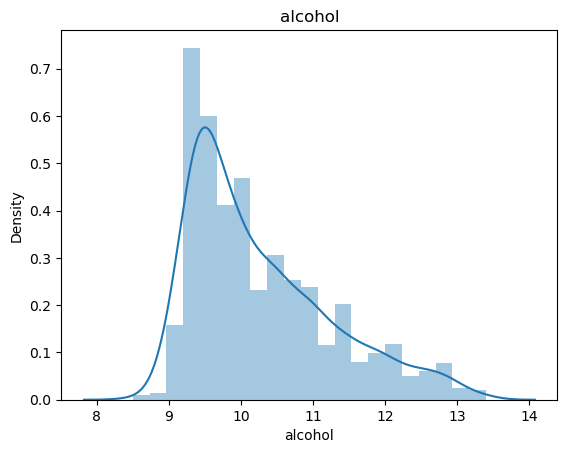

C:\Users\minhd\AppData\Local\Temp\ipykernel_13196\4189465094.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(red_qualified[i])


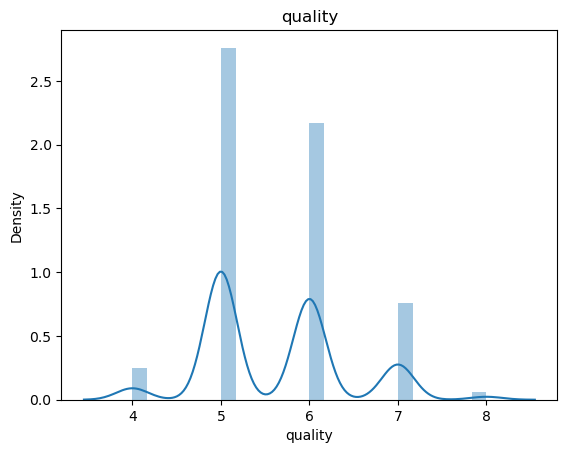

In [9]:
for i in red_qualified.columns:
    sns.distplot(red_qualified[i])
    plt.title(i)
    plt.show()

In [10]:
median = []
mean = []
for i in red_qualified.columns:
    med = red_qualified[i].median()
    me = red_qualified[i].mean()
    median.append(med)
    mean.append(me)
print(median)
print(mean)

[7.9, 0.5, 0.25, 2.2, 0.08, 13.0, 38.0, 0.9968, 3.31, 0.615, 10.0, 5.0]
[8.3546699875467, 0.5297633872976338, 0.26235367372353674, 2.396637608966376, 0.0830678704856787, 14.868617683686177, 46.374221668742216, 0.9968806973848071, 3.313524283935243, 0.6447322540473226, 10.26780821917808, 5.605230386052304]


In [11]:
X1 = red_qualified.drop(columns = 'quality')
Y1 = red_qualified['quality']


In [12]:
s = StandardScaler()
X1_s = s.fit_transform(X1)

In [13]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [8, 10, 12, 14],
    'max_features': [2, 3, 12],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [14]:
pipeline = Pipeline(steps = [('scaler', StandardScaler()), ('pca', PCA(n_components = 6)), ('random_forest', RandomForestRegressor(n_estimators = 1000, 
                            criterion = 'squared_error', max_depth = 14, min_samples_leaf = 3, min_samples_split = 8, max_features = 12, bootstrap = True))])
pipeline.fit(X1, Y1)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=6)),
                ('random_forest',
                 RandomForestRegressor(max_depth=14, max_features=12,
                                       min_samples_leaf=3, min_samples_split=8,
                                       n_estimators=1000))])

In [15]:
grid_search.fit(X1_s, Y1)
grid_search.best_params_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


{'bootstrap': True,
 'max_depth': 14,
 'max_features': 12,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [16]:
# imbalanced: chlorides, sulphates, alcohol, total sulfur dioxide, free sulfur dioxide, residual sugar, fixed acidity


In [17]:
train_data_white = train_data[train_data['type'] == 'white']
train_data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.6,0.3,0.36,1.2,0.035,43,126,0.9909,3.01,0.63,11.4,6,white
3,7.5,0.4,0.33,5.0,0.045,30,131,0.9942,3.32,0.44,10.9,6,white
4,6.4,0.2,0.25,20.2,0.083,35,157,0.9998,3.17,0.50,9.1,5,white
5,7.6,0.3,0.52,13.2,0.042,61,148,0.9984,2.98,0.47,9.1,6,white
6,6.4,0.3,0.40,6.2,0.040,46,169,0.9953,3.15,0.46,9.3,6,white


In [18]:
train_data_white = train_data_white.drop(columns = ['type'])


In [19]:
y = np.abs(stats.zscore(train_data_white))

In [20]:
white_qualified = train_data_white[(y < 3).all(axis=1)]
white_qualified

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.6,0.3,0.36,1.2,0.035,43,126,0.9909,3.01,0.63,11.4,6
3,7.5,0.4,0.33,5.0,0.045,30,131,0.9942,3.32,0.44,10.9,6
4,6.4,0.2,0.25,20.2,0.083,35,157,0.9998,3.17,0.50,9.1,5
5,7.6,0.3,0.52,13.2,0.042,61,148,0.9984,2.98,0.47,9.1,6
6,6.4,0.3,0.40,6.2,0.040,46,169,0.9953,3.15,0.46,9.3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6709,7.2,0.2,0.19,7.7,0.045,53,176,0.9958,3.17,0.38,9.5,5
6710,6.7,0.3,0.34,7.5,0.036,39,124,0.9912,2.99,0.32,12.4,8
6711,6.6,0.3,0.24,3.3,0.034,29,99,0.9903,3.10,0.40,12.3,7
6712,8.0,0.2,0.31,5.6,0.049,24,97,0.9930,3.10,0.42,10.9,5


In [21]:
X2 = white_qualified.drop(columns = 'quality')
Y2 = white_qualified['quality']


In [22]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 14, num = 14)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(1, 20, num = 20)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 10, num = 10)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [23]:
X2_s = s.fit_transform(X2)

In [24]:
grid_search.fit(X2_s, Y2)
grid_search.best_params_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


{'bootstrap': True,
 'max_depth': 14,
 'max_features': 12,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X2_s, Y2)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15,
                                                              16, 17, 18, 19,
                                                              20],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 7,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 13,
 'bootstrap': False}

In [ ]:
test_data = pd.read_csv('test.csv', sep = ';')
test_data.head(5)

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,1257,7.2,0.25,0.37,2.5,0.063,11.0,41.0,0.99439,3.52,0.80,12.4,red
1,6409,8.2,0.27,0.39,7.8,0.039,49.0,208.0,0.99760,3.31,0.51,9.5,white
2,136,8.9,0.32,0.49,1.6,0.050,17.0,131.0,0.99560,3.13,0.34,9.4,white
3,1631,7.4,0.16,0.30,13.7,0.056,33.0,168.0,0.99825,2.90,0.44,8.7,white
4,6084,6.4,0.28,0.56,1.7,0.156,49.0,106.0,0.99354,3.10,0.37,9.2,white


In [ ]:
test_red = test_data[test_data['type'] == 'red']
test_red.head(5)

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,1257,7.2,0.25,0.37,2.5,0.063,11.0,41.0,0.99439,3.52,0.80,12.4,red
5,5434,10.2,0.54,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,red
7,5146,6.2,0.39,0.43,2.0,0.071,14.0,24.0,0.99428,3.45,0.87,11.2,red
12,219,6.0,0.31,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,red
13,6403,10.4,0.41,0.55,3.2,0.076,22.0,54.0,0.99960,3.15,0.89,9.9,red


In [ ]:
id1 = test_red['id']
test_red_qualified = test_red.drop(columns = ['id','type'])
test_red_qualified_s = s.transform(test_red_qualified)

In [ ]:
predicted1 = pipeline.predict(test_red_qualified)

In [ ]:
data = {'id': id1, 'quality': predicted1}
red_table = pd.DataFrame(data)
red_table.head(5)

,id,quality
0,1257,6.911450
5,5434,5.461365
7,5146,6.762750
12,219,6.107973
13,6403,5.700327


In [ ]:
test_white = test_data[test_data['type'] == 'white']

In [ ]:
id2 = test_white['id']
test_white_qualified = test_white.drop(columns = ['id','type'])
test_white_qualified_s = s.transform(test_white_qualified)

In [ ]:
predicted2 = rf_random.predict(test_white_qualified_s)

In [ ]:
data2 = {'id': id2, 'quality': predicted2}
white_table = pd.DataFrame(data2)
white_table.head(5)

,id,quality
1,6409,5.534793
2,136,5.081885
3,1631,6.743403
4,6084,5.394215
6,1094,5.435286


In [ ]:
table = pd.concat([red_table, white_table])
table

,id,quality
0,1257,6.911450
5,5434,5.461365
7,5146,6.762750
12,219,6.107973
13,6403,5.700327
...,...,...
813,1366,5.948670
815,4646,6.422026
816,734,5.494042
818,1579,6.703214


In [ ]:
csv_filename = 'results.csv'
table.to_csv(csv_filename, index = False)
print(f'DataFrame saved to {csv_filename}')

DataFrame saved to results.csv
